In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Original chatgpt

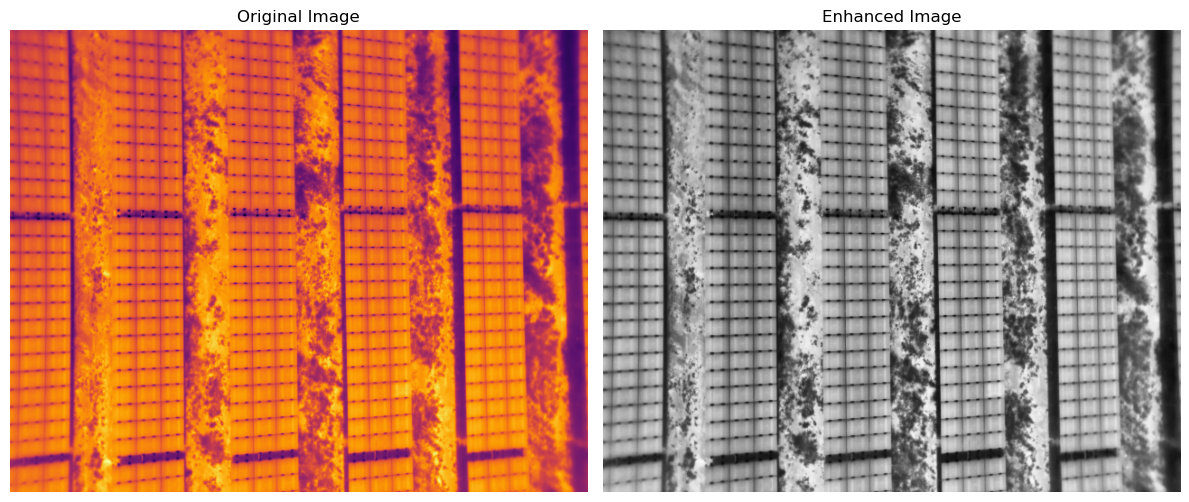

In [53]:
import cv2
import numpy as np

# Load thermal image
file_path = r"P:\Thesis\PV cell\thermal_projection\output\thermal_images\1.png"
# Load the original thermal image in RGB format
original_image = cv2.imread(file_path)
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert the image to grayscale for processing
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
enhanced_gray = clahe.apply(gray_image)

# Merge the enhanced grayscale back into RGB using the original image's color
enhanced_image = cv2.cvtColor(enhanced_gray, cv2.COLOR_GRAY2RGB)

# Display the original and enhanced images side by side
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

# Enhanced image
plt.subplot(1, 2, 2)
plt.title("Enhanced Image")
plt.imshow(enhanced_image)
plt.axis('off')

# Show the results
plt.tight_layout()
plt.show()

### Corner Detection

Harris Corner Detection

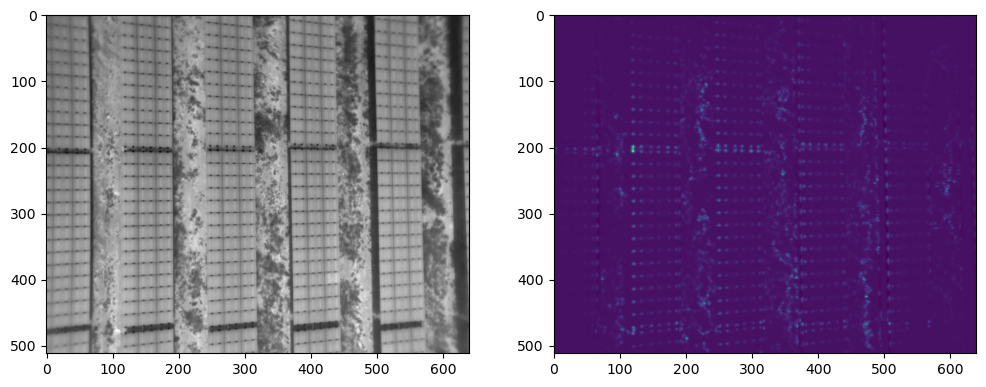

In [54]:
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap="gray")

plt.subplot(1, 2, 2)
blockSize = 5
sobelSize = 5
k = 0.01
harris = cv2.cornerHarris(gray, blockSize, sobelSize, k)
plt.imshow(harris)

plt.show()

Shi-Tomasi Corner Detection

C:\Users\tahza\AppData\Local\Temp\ipykernel_12464\1750026894.py:8: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # Convert to integer coordinates


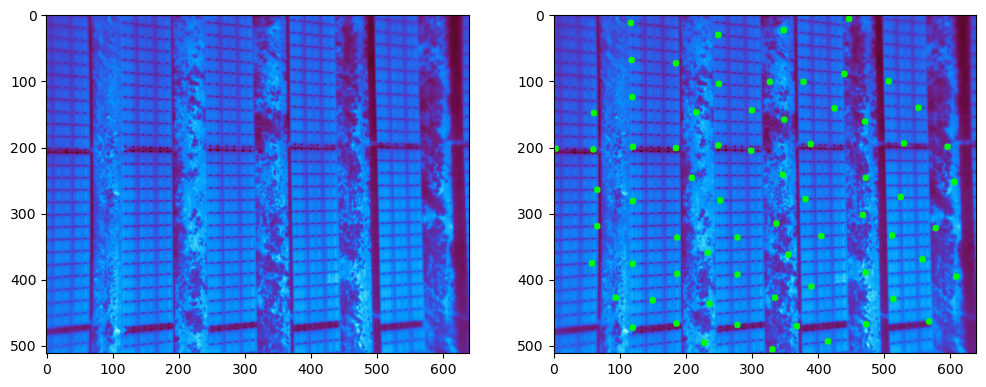

In [64]:
# Shi-Tomasi Corner Detection
corners = cv2.goodFeaturesToTrack(
    gray, 
    maxCorners=100,    # Number of corners to detect
    qualityLevel=0.1, # Minimum quality of corners (0 to 1)
    minDistance=50     # Minimum Euclidean distance between detected corners
)
corners = np.int0(corners)  # Convert to integer coordinates

# Visualize the detected corners
image_with_corners = image.copy()
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image_with_corners, (x, y), 5, (0, 255, 0), -1)

# Plot the original and corner-detected images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))

plt.show()

### Edge Detection

Canny Edge Detection

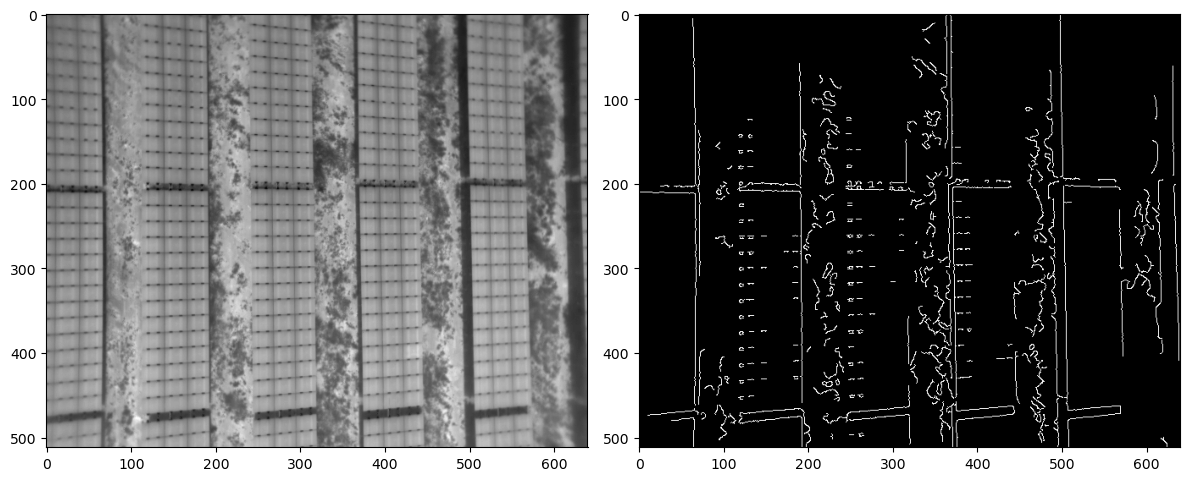

In [74]:
gray = gray.astype('uint8')

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Apply Canny Edge Detection
edges = cv2.Canny(blurred, threshold1=100, threshold2=180)

# Plot the original and edges
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')

# Edge-detected image
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')

plt.tight_layout()
plt.show()

Crack test

In [51]:
# Path to the directory with grayscale images
input_folder = r"P:\Thesis\PV cell\crack_segmentation\train\ann"
output_folder = r"P:\Thesis\PV cell\crack_segmentation\train\ann_palettized"

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Define the palette map (R, G, B)
palette = {
    0: (0, 0, 0),         # Background
    3: (255, 0, 0),       # Crack (Red)
    4: (0, 255, 0)        # Separation Line (Green)
}

def palettize_image(image, palette):
    # Create an RGB image of the same dimensions
    palettized_image = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
    # Apply the palette
    for gray_value, (r, g, b) in palette.items():
        palettized_image[image == gray_value] = [r, g, b]
    
    return palettized_image

# Iterate over all files in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.png'):
        # Load the grayscale image
        grayscale_path = os.path.join(input_folder, filename)
        grayscale_image = cv2.imread(grayscale_path, cv2.IMREAD_GRAYSCALE)
        
        if grayscale_image is None:
            print(f"Failed to load {grayscale_path}")
            continue
        
        # Palettize the image
        palettized_image = palettize_image(grayscale_image, palette)
        
        # Convert to PIL format and save as PNG
        output_path = os.path.join(output_folder, filename)
        Image.fromarray(palettized_image).save(output_path)
        print(f"Saved palettized image: {output_path}")

print("All images have been processed and saved as palettized images.")

Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0003.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0004.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0006.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0007.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0008.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0009.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0011.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0012.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0013.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0014.png
Saved palettized image: P:\Thesis\PV cell\crack_segmentation\train\ann_palettized\0019.png